In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

**Dataset Info**

In [4]:
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64


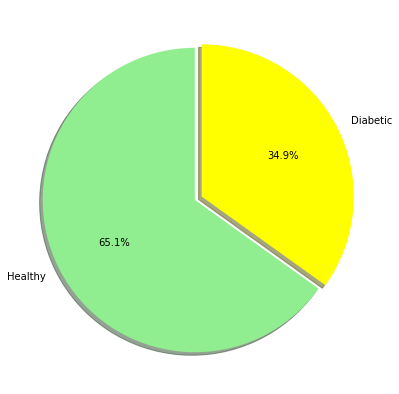

In [8]:
labels = ['Healthy', 'Diabetic']
sizes = dataset['Outcome'].value_counts(sort = True)
print(sizes)

colors = ["lightgreen","yellow"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

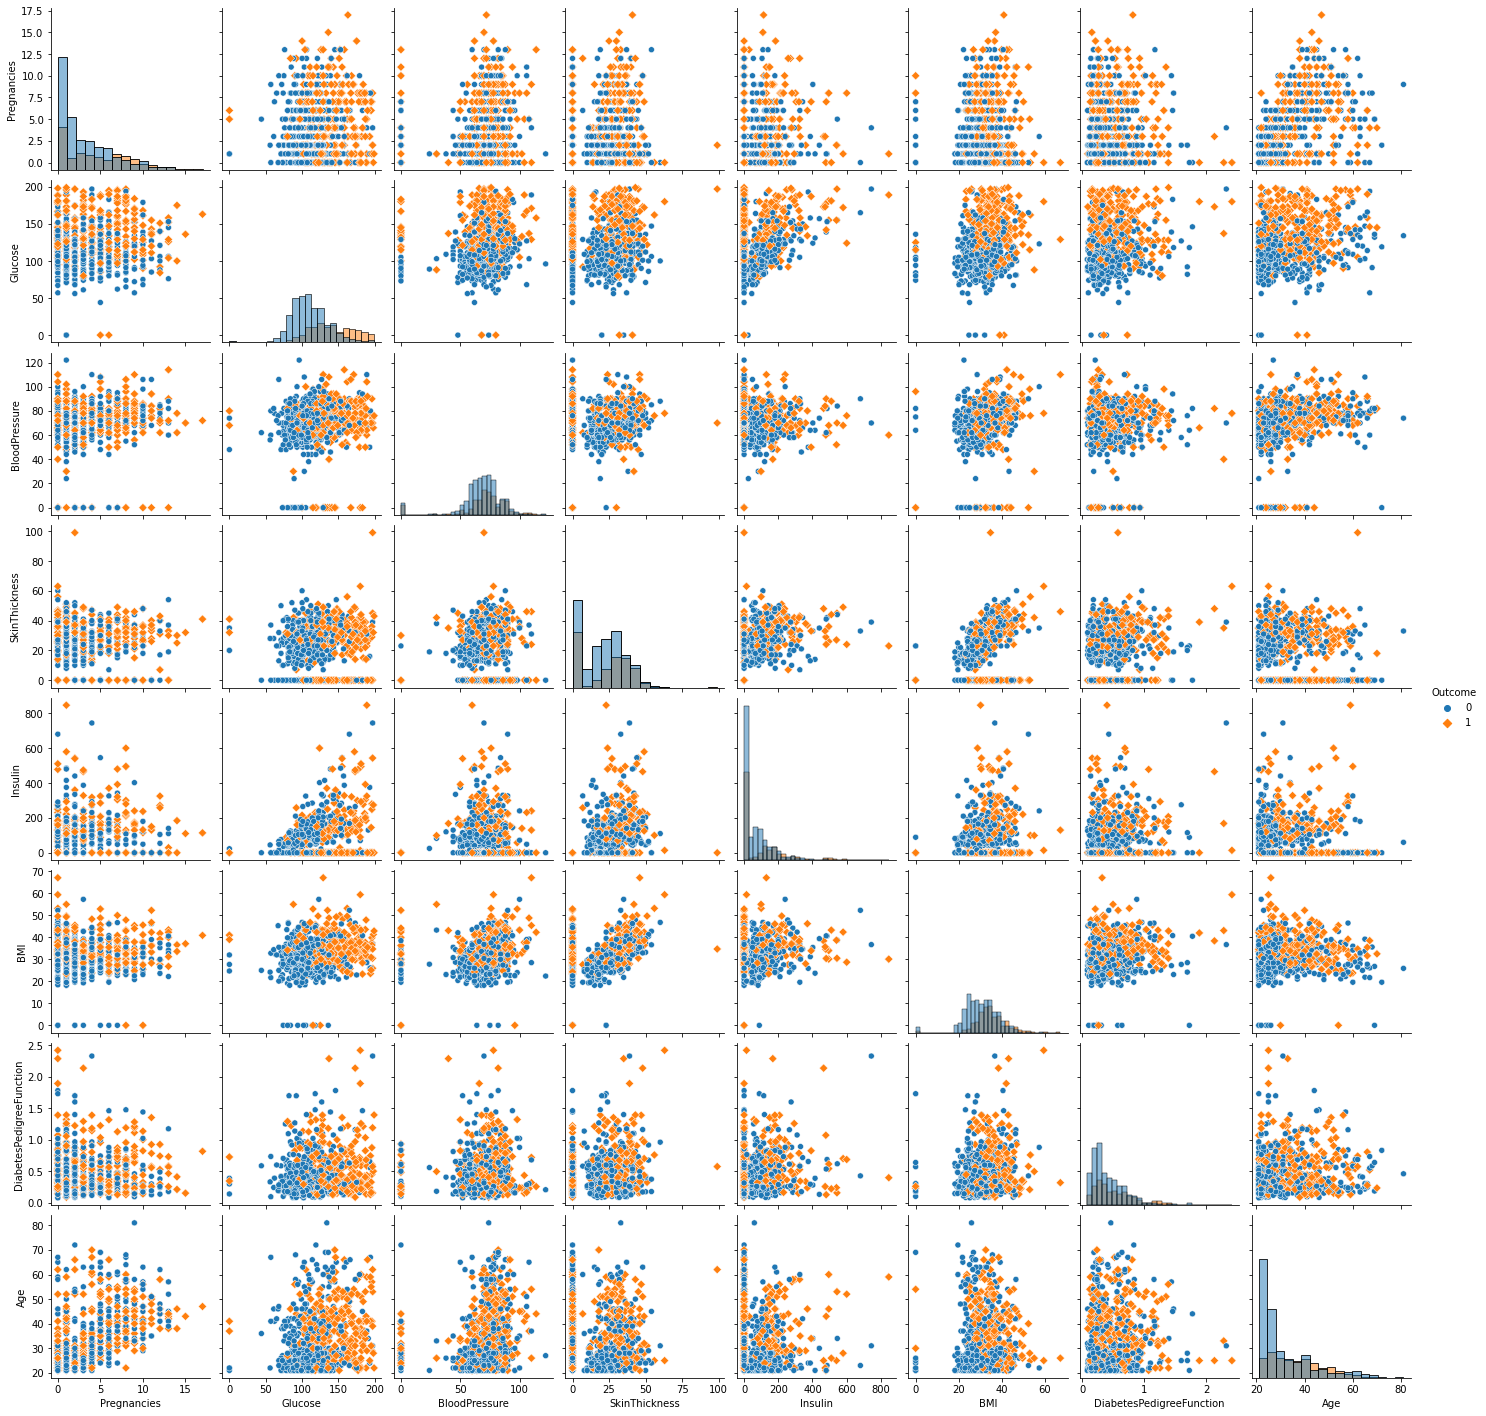

In [9]:
sns.pairplot(data=dataset,hue='Outcome',diag_kind='hist', markers=["o", "D"])
plt.show()

**From the scatter graph, we can see there are outliers in the dataset that should be removed. Box plot can be used to detect and remove outliers. We used median imputation to replace the outliers.** 

In [10]:
columns = dataset.columns
# remove Output
columns = columns[:-1]
print(type(columns))
print(columns)

<class 'pandas.core.indexes.base.Index'>
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


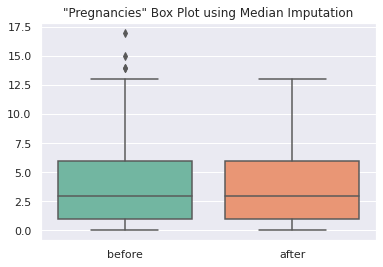

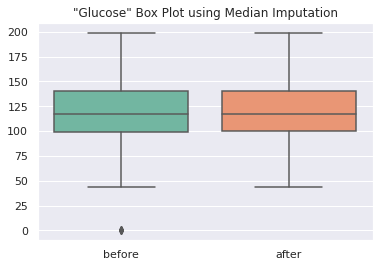

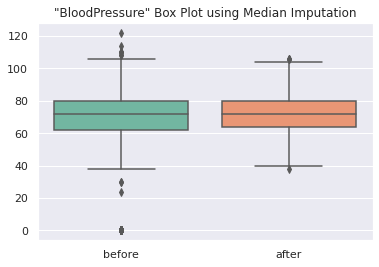

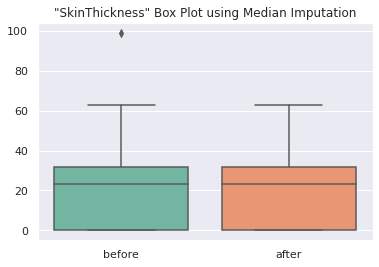

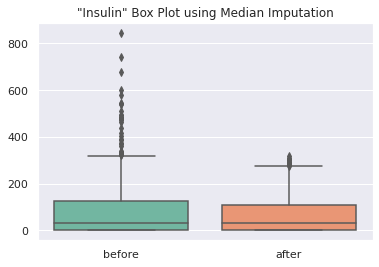

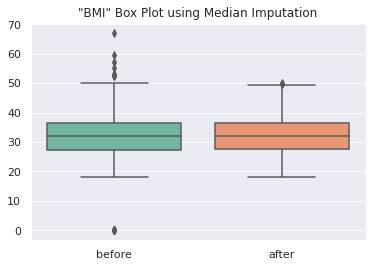

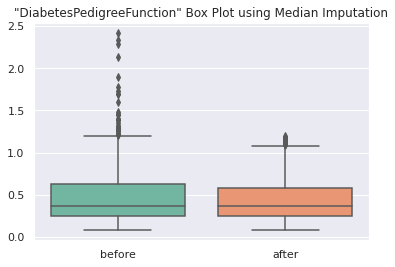

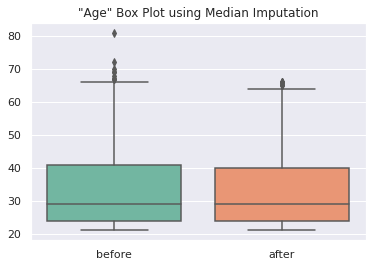

In [11]:
dataset = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
for col in columns:
    before = dataset[col].copy()

    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(dataset[col])
    for i in dataset[col]:
        if i > Upper_tail or i < Lower_tail:
                dataset[col] = dataset[col].replace(i, med)
    
    after = dataset[col]
    d = {'before': before, 'after': after}
    df = pd.DataFrame(data=d)
    
    sns.set_theme(style="darkgrid")
    sns.boxplot(data = df, palette="Set2")
    plt.title('"{}" Box Plot using Median Imputation'.format(col))
    plt.show()  

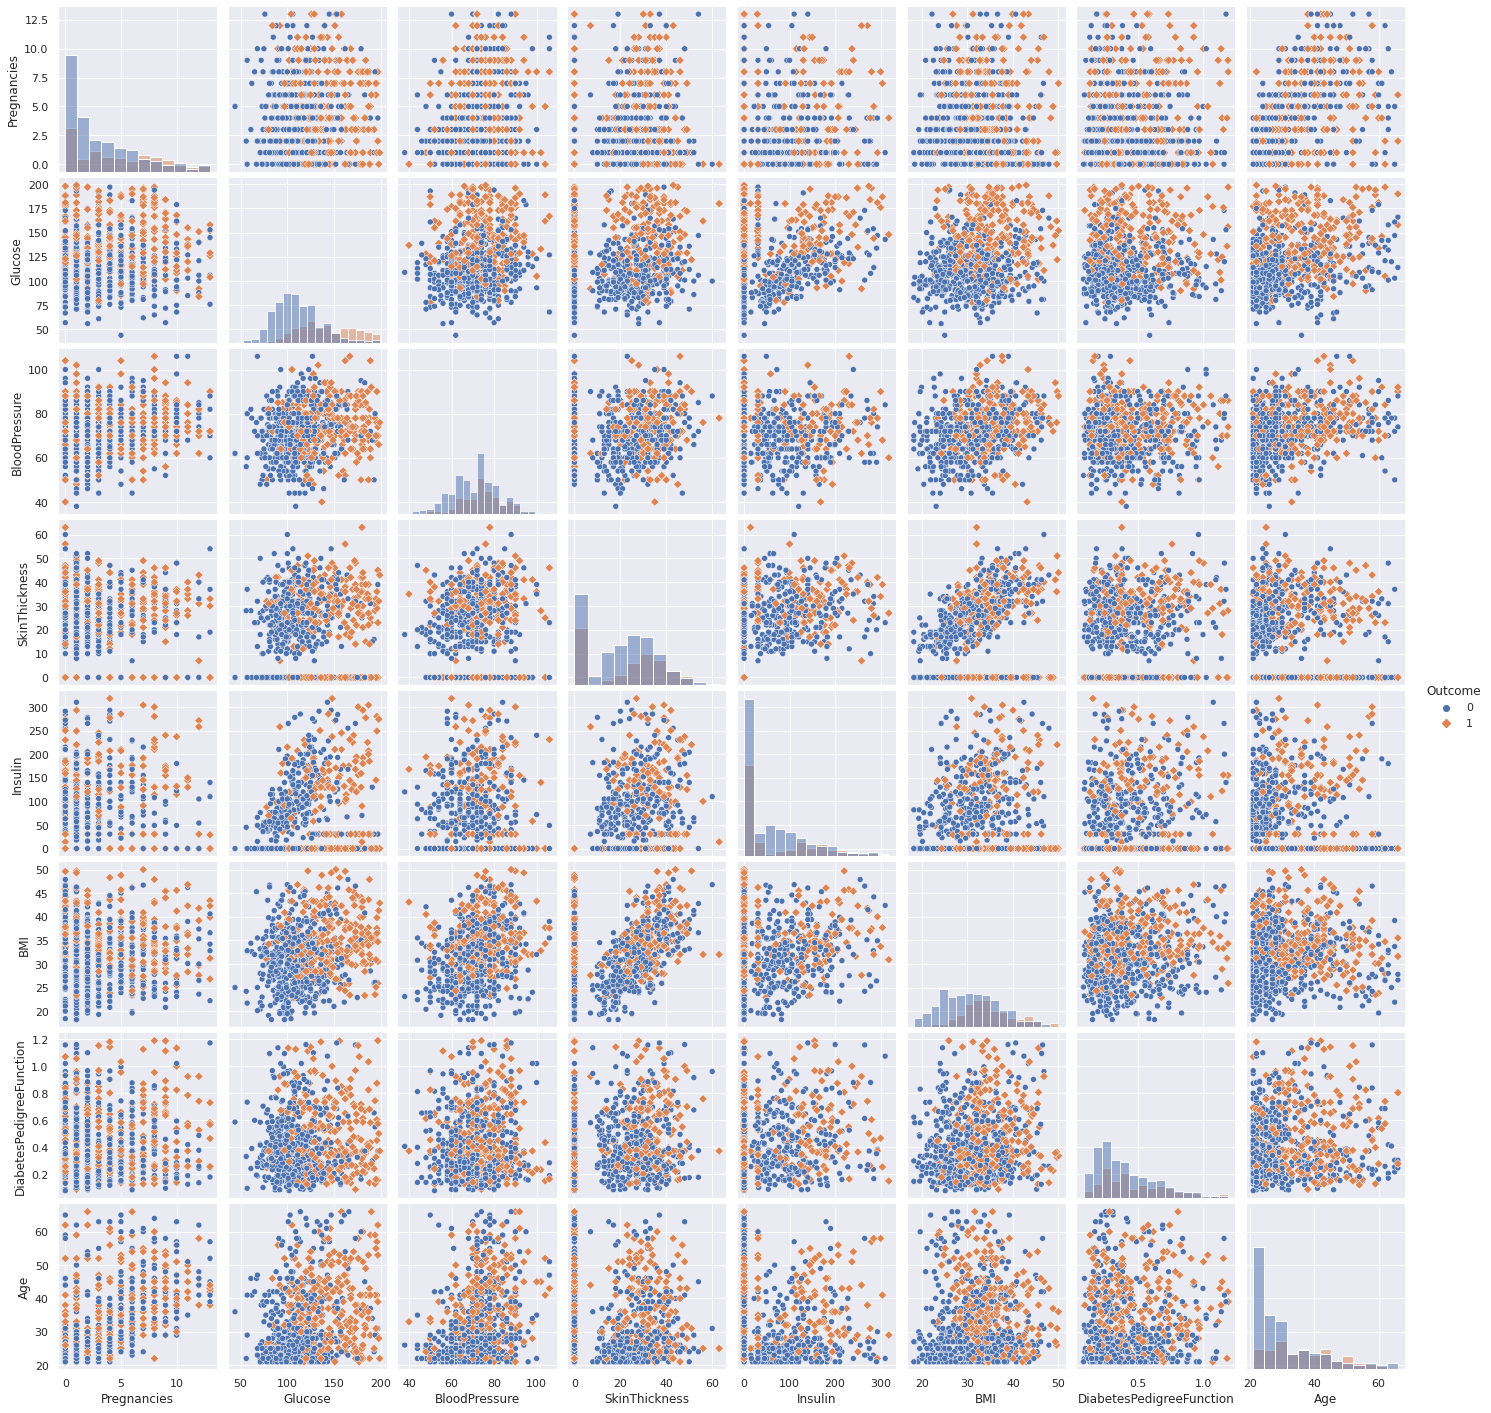

In [12]:
# pair plot after removing outliers
sns.pairplot(data=dataset,hue='Outcome',diag_kind='hist', markers=["o", "D"])
plt.show()

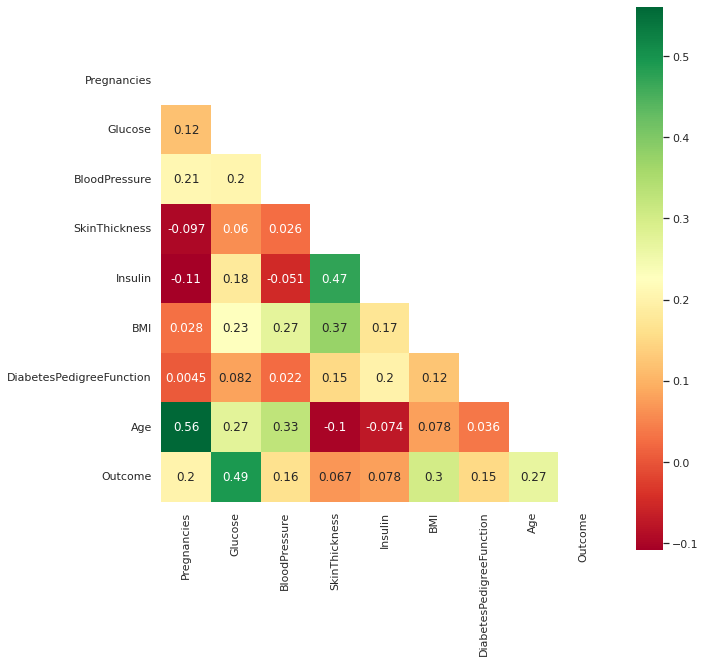

In [13]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="RdYlGn", annot= True)

**Explore the motivation of removing outliers**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       147
           1       0.79      0.57      0.66        84

    accuracy                           0.79       231
   macro avg       0.79      0.74      0.75       231
weighted avg       0.79      0.79      0.78       231

ROC AUC score: 0.8185131195335278
Accuracy Score:  0.7878787878787878


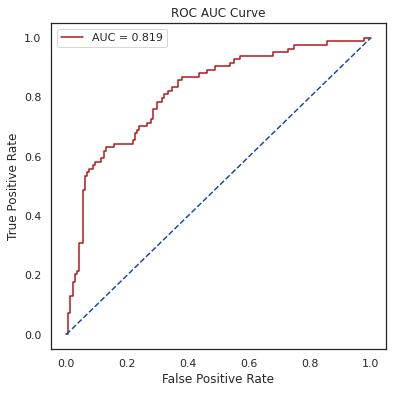

<Figure size 432x432 with 0 Axes>

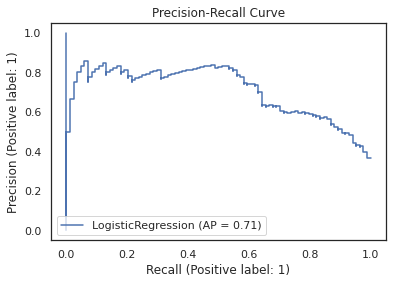

In [15]:
dataset_origin = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

x = dataset_origin.iloc[:, :-1].values
y = dataset_origin.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 8)

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.76      0.57      0.65        84

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231

ROC AUC score: 0.8144638807904114
Accuracy Score:  0.7792207792207793


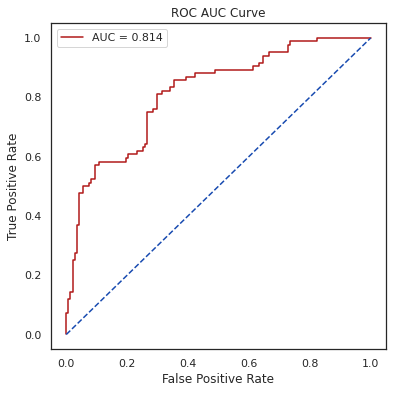

<Figure size 432x432 with 0 Axes>

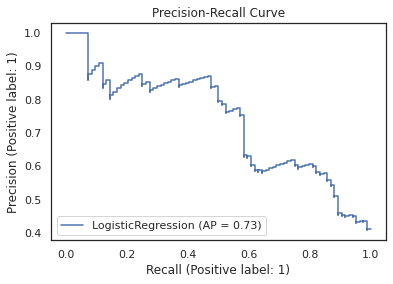

In [16]:

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 8)

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

**Model**

In [17]:
random_number = 8
model_list = []

In [18]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= random_number)

In [19]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (537, 8)
Number transactions y_train dataset:  (537,)
Number transactions x_test dataset:  (231, 8)
Number transactions y_test dataset:  (231,)


In [20]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[random_number]}])]
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[random_number]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[random_number]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[random_number]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 30)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 76.51%
Best Parameters :  {'C': 0.25, 'random_state': 8}

----------------

KNeighborsClassifier():
Best Accuracy : 71.69%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 10}

----------------

SVC():
Best Accuracy : 76.33%
Best Parameters :  {'C': 0.25, 'kernel': 'linear', 'random_state': 8}

----------------

RandomForestClassifier():
Best Accuracy : 76.15%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 8}

----------------

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
          

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       147
           1       0.72      0.56      0.63        84

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231

ROC AUC score: 0.8347910592808553
Accuracy Score:  0.7619047619047619


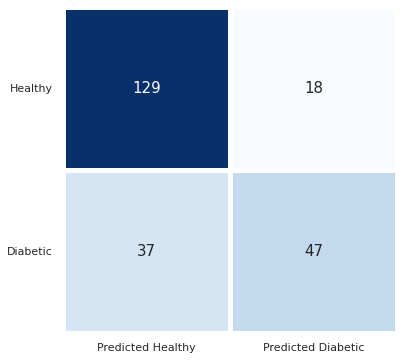

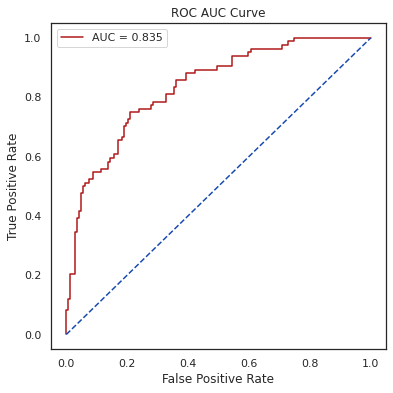

<Figure size 432x432 with 0 Axes>

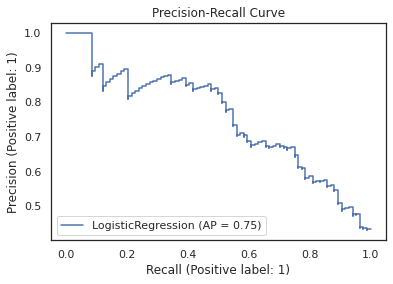

In [24]:
#Fitting Logistic Regression Model
classifier = LogisticRegression(C= 0.25, random_state= 8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

model_list.append(['Logistic Regreesion', classifier])

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [25]:
logreg = LogisticRegression()
logreg
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 1)          
rfe = rfe.fit(x_train, y_train)

list(zip(dataset.columns[:-1], rfe.support_, rfe.ranking_))

[('Pregnancies', True, 1),
 ('Glucose', True, 1),
 ('BloodPressure', False, 3),
 ('SkinThickness', False, 4),
 ('Insulin', False, 5),
 ('BMI', True, 1),
 ('DiabetesPedigreeFunction', True, 1),
 ('Age', False, 2)]

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       147
           1       0.75      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

ROC AUC score: 0.8302559118885648
Accuracy Score:  0.7705627705627706


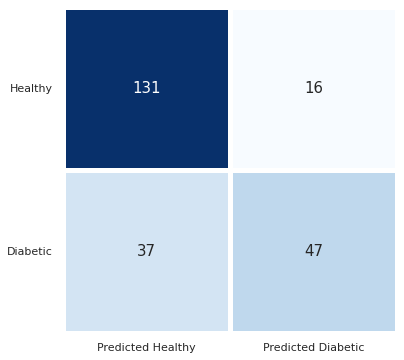

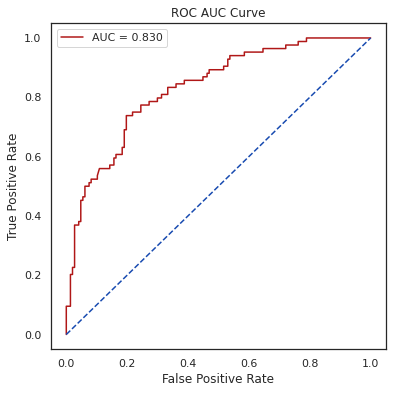

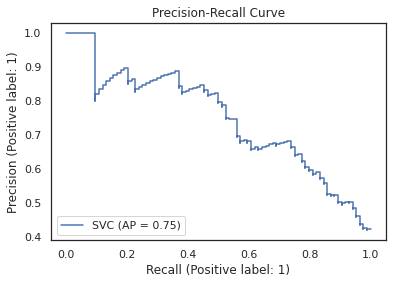

In [26]:
#Fitting SVC Model
classifier = SVC(C= 0.25, kernel= 'linear', random_state= 8, probability=True)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

model_list.append(['SVM', classifier])

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [27]:
print(model_list)

[['Logistic Regreesion', LogisticRegression(C=0.25, random_state=8)], ['SVM', SVC(C=0.25, kernel='linear', probability=True, random_state=8)]]


              precision    recall  f1-score   support

           0       0.81      0.80      0.81       147
           1       0.66      0.67      0.66        84

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

ROC AUC score: 0.8244250080984775
Accuracy Score:  0.7532467532467533


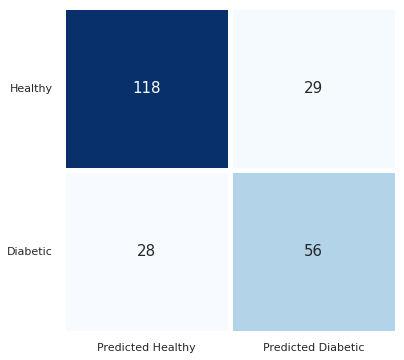

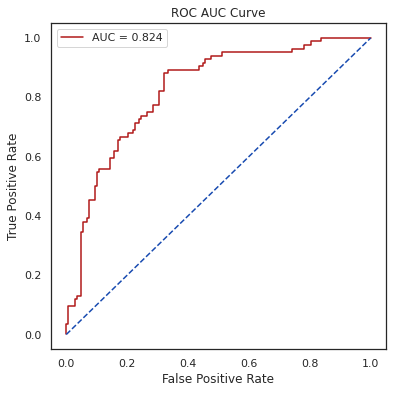

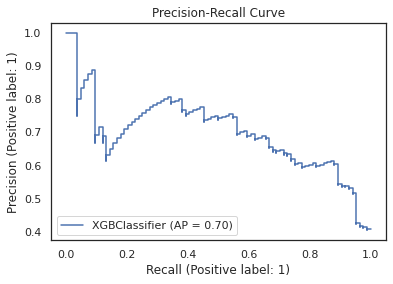

In [28]:
#Fitting XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

model_list.append(['XGBoost', classifier])


print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       147
           1       0.74      0.48      0.58        84

    accuracy                           0.75       231
   macro avg       0.75      0.69      0.70       231
weighted avg       0.75      0.75      0.73       231

ROC AUC score: 0.7969711694201489
Accuracy Score:  0.7489177489177489


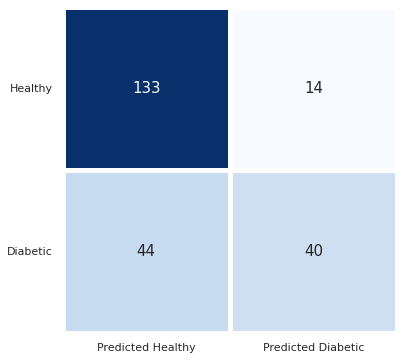

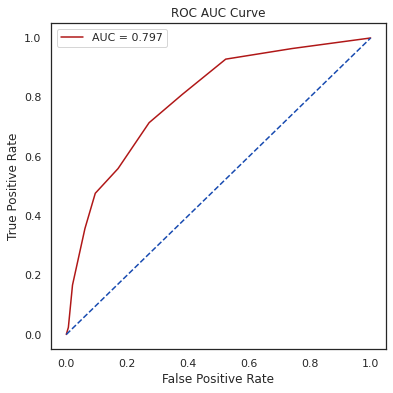

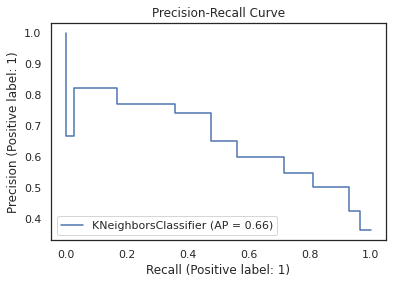

In [29]:
#Fitting KNeighborsClassifier Model
classifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 10)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

model_list.append(['KNeighbors', classifier])


print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       147
           1       0.71      0.61      0.65        84

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231

ROC AUC score: 0.8366132167152575
Accuracy Score:  0.7662337662337663


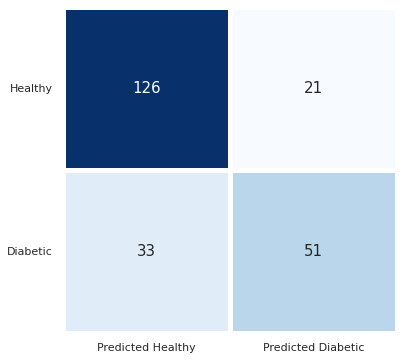

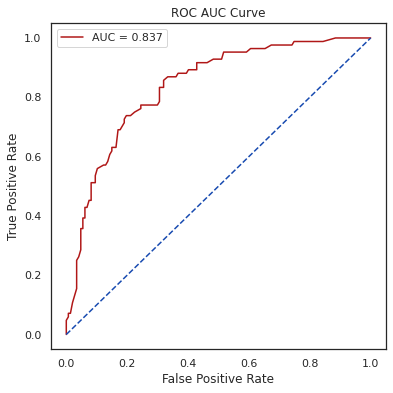

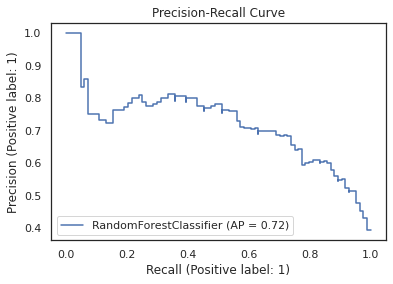

In [30]:
#Fitting RandomForestClassifier Model
classifier = RandomForestClassifier(criterion= 'entropy', n_estimators= 150, random_state= 8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)


model_list.append(['Random_Forest', classifier])

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

#Precision Recall Curve
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [31]:

print(model_list)
res = []

for m in range(len(model_list)):
    lst_2= []
    model = model_list[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    lst_2.append(model_list[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    res.append(lst_2)

[['Logistic Regreesion', LogisticRegression(C=0.25, random_state=8)], ['SVM', SVC(C=0.25, kernel='linear', probability=True, random_state=8)], ['XGBoost', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)], ['KNeighbors', KNeighborsClassifier(metric='manhattan', n_neighbors=10)], ['Random_Forest', RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=8)]]


In [32]:
df = pd.DataFrame(res, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)

In [33]:
df #compare

Model   Accuracy  K-Fold Mean Accuracy  Std. Deviation  \
1                  SVM  77.056277             75.988819        5.157020   
4        Random_Forest  76.623377             74.856744        5.668141   
0  Logistic Regreesion  76.190476             76.921733        5.005203   
2              XGBoost  75.324675             75.244584        4.402495   
3           KNeighbors  74.891775             71.914745        6.456543   

    ROC AUC  Precision    Recall        F1  
1  0.725340   0.746032  0.559524  0.639456  
4  0.732143   0.708333  0.607143  0.653846  
0  0.718537   0.723077  0.559524  0.630872  
2  0.734694   0.658824  0.666667  0.662722  
3  0.690476   0.740741  0.476190  0.579710

**Comparison**

As given in the table above, the highest accuracy achieved among all models is 77.056, attained by SVM. Logistic Regression has the highest K-fold Mean accuracy and 2nd lowest standard deviation for the mean accuracy (First being XGBoost). From evaluation metrics (Precision, recall, and F1) we can see that Logistic Regression, Random Forest, and SVM are in very close competition. Since the goal of this project is to provide a classification model which more accurately predicts true diabetic cases, recall holds slightly more importance here than precision, therefore I prefer to choose Random Forest which has a much better recall than SVM and Logistic regression.